# Budget vs Actual & Forecasting Analysis (FP&A)

Tried to execute a finance-oriented forecasting workflow using industrial production data as a proxy for demand.  
It applies regression and statistical time-series models aligned with applied forecasting methodologies.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime as dt
pd.set_option("display.max_columns", None)
plt.style.use("default")


In [33]:
file_path = "C:\\Users\\sniks\\Downloads\\Use_Based_Monthly_Indices_of_IIP_1.csv"
df = pd.read_csv(file_path)
df.head()


,Month,Basic goods,Capital goods,Intermediate goods,Consumer Durables,Consumer Non-durables,Consumer goods Total
0,Apr 05,100.3,85.3,97.9,107.2,99.8,101.9
1,May 05,103.5,99.6,102.5,119.4,97.7,103.8
2,Jun 05,101.5,105.8,102.6,115.0,105.2,108.0
3,Jul 05,100.6,106.6,106.8,111.7,97.8,101.7
4,Aug 05,101.8,113.2,105.8,117.7,98.6,104.0


In [34]:
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)
df.info()


Shape: (98, 7)

Columns:
Index(['Month', 'Basic goods', 'Capital goods', 'Intermediate goods',
       'Consumer Durables', 'Consumer Non-durables', 'Consumer goods Total'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  98 non-null     object 
 1   Basic goods            98 non-null     float64
 2   Capital goods          98 non-null     float64
 3   Intermediate goods     98 non-null     float64
 4   Consumer Durables      98 non-null     float64
 5   Consumer Non-durables  98 non-null     float64
 6   Consumer goods Total   98 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.5+ KB


In [35]:
df["Month"].unique()


array(['Apr 05', 'May 05', 'Jun 05', 'Jul 05', 'Aug 05', 'Sep 05',
       'Oct 05', 'Nov 05', 'Dec 05', 'Jan 06', 'Feb 06', 'Mar 06',
       'Apr 06', 'May 06', 'Jun 06', 'Jul 06', 'Aug 06', 'Sep 06',
       'Oct 06', 'Nov 06', 'Dec 06', 'Jan 07', 'Feb 07', 'Mar 07',
       'Apr 07', 'May 07', 'Jun 07', 'Jul 07', 'Aug 07', 'Sep 07',
       'Oct 07', 'Nov 07', 'Dec 07', 'Jan 08', 'Feb 08', 'Mar 08',
       'Apr 08', 'May 08', 'Jun 08', 'Jul 08', 'Aug 08', 'Sep 08',
       'Oct 08', 'Nov 08', 'Dec 08', 'Jan 09', 'Feb 09', 'Mar 09',
       'Apr 09', 'May 09', 'Jun 09', 'Jul 09', 'Aug 09', 'Sep 09',
       'Oct 09', 'Nov 09', 'Dec 09', 'Jan 10', 'Feb 10', 'Mar 10',
       'Apr 10', 'May 10', 'Jun 10', 'Jul 10', 'Aug 10', 'Sep 10',
       'Oct 10', 'Nov 10', 'Dec 10', 'Jan 11', 'Feb 11', 'Mar 11',
       'Apr 11', 'May 11', 'Jun 11', 'Jul 11', 'Aug 11', 'Sep 11',
       'Oct 11', 'Nov 11', 'Dec 11', 'Jan 12', 'Feb 12', 'Mar 12',
       'Apr 12', 'May 12', 'Jun 12', 'Jul 12', 'Aug 12', 'Sept

In [36]:
df["Month"] = df["Month"].str.replace("Sept", "Sep", regex=False)


In [37]:
df["Month"] = pd.to_datetime(df["Month"], format="%b %y")

df.set_index("Month", inplace=True)

df.sort_index(inplace=True)

df.head()


,Basic goods,Capital goods,Intermediate goods,Consumer Durables,Consumer Non-durables,Consumer goods Total
Month,,,,,,
2005-04-01,100.3,85.3,97.9,107.2,99.8,101.9
2005-05-01,103.5,99.6,102.5,119.4,97.7,103.8
2005-06-01,101.5,105.8,102.6,115.0,105.2,108.0
2005-07-01,100.6,106.6,106.8,111.7,97.8,101.7
2005-08-01,101.8,113.2,105.8,117.7,98.6,104.0


In [38]:
df.isna().sum()


Basic goods              0
Capital goods            0
Intermediate goods       0
Consumer Durables        0
Consumer Non-durables    0
Consumer goods Total     0
dtype: int64

In [39]:
df.describe()


,Basic goods,Capital goods,Intermediate goods,Consumer Durables,Consumer Non-durables,Consumer goods Total
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,132.374490,220.079592,131.874490,226.936735,131.193878,158.366327
std,16.866445,62.937747,14.409134,67.736257,18.340349,28.924637
min,99.900000,85.300000,97.900000,102.700000,97.700000,101.700000
25%,121.775000,181.050000,123.050000,170.400000,120.550000,143.325000
50%,131.450000,233.900000,133.450000,235.400000,128.650000,159.250000
75%,146.950000,257.175000,144.075000,283.400000,140.675000,179.525000
max,168.200000,392.200000,158.800000,336.200000,176.200000,208.300000


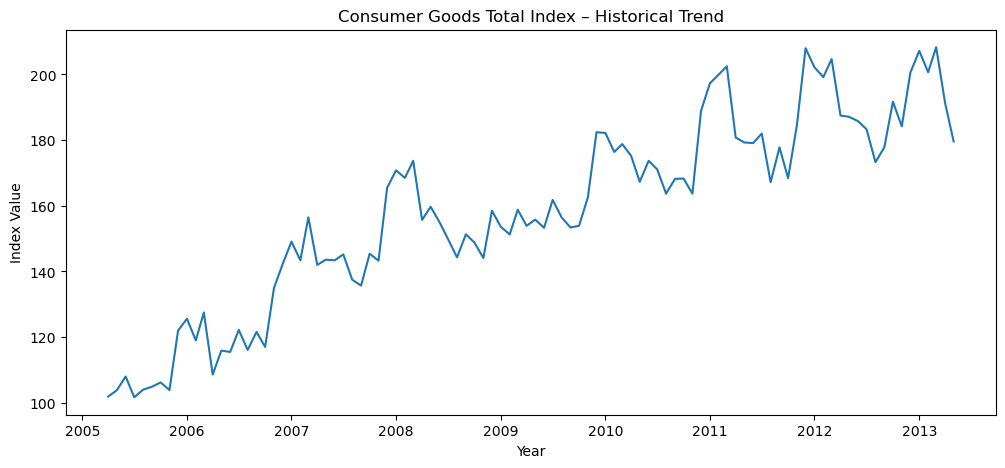

In [40]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Consumer goods Total"])
plt.title("Consumer Goods Total Index – Historical Trend")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.show()


In [41]:
df["time_index"] = np.arange(len(df))

y = df["Consumer goods Total"]

X = df[["time_index"]]

X.head(), y.head()


(            time_index
 Month                 
 2005-04-01           0
 2005-05-01           1
 2005-06-01           2
 2005-07-01           3
 2005-08-01           4,
 Month
 2005-04-01    101.9
 2005-05-01    103.8
 2005-06-01    108.0
 2005-07-01    101.7
 2005-08-01    104.0
 Name: Consumer goods Total, dtype: float64)

## Regression-Based Forecasting 

A linear regression model is built using a time index as the predictor.  
This provides a baseline forecast aligned with least squares regression principles.


In [42]:
split = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


## Evaluation of Regression Forecast

Forecast accuracy is evaluated using MAE and RMSE, which are standard metrics for assessing point forecasts.


In [43]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression MAE:", round(mae_lr, 2))
print("Linear Regression RMSE:", round(rmse_lr, 2))


Linear Regression MAE: 12.99
Linear Regression RMSE: 15.49


## Statistical Time-Series Forecasting (ARIMA)

An ARIMA model is implemented as a classical statistical approach to capture temporal dependencies in the data.


In [44]:
from statsmodels.tsa.arima.model import ARIMA
pd.set_option("display.max_columns", None)


In [ ]:
y_train = y_train.asfreq("MS")
y_test = y_test.asfreq("MS")


In [60]:
arima_model = ARIMA(y_train, order=(1,1,1))
arima_result = arima_model.fit()
y_pred_arima = arima_result.forecast(steps=len(y_test))


In [61]:
mae_arima = mean_absolute_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
print("ARIMA MAE:", round(mae_arima, 2))
print("ARIMA RMSE:", round(rmse_arima, 2))


ARIMA MAE: 16.34
ARIMA RMSE: 19.32


## Comparison 

In [62]:
comparison = pd.DataFrame({"Model": ["Linear Regression", "ARIMA"], "MAE": [mae_lr, mae_arima], "RMSE": [rmse_lr, rmse_arima]})
comparison


,Model,MAE,RMSE
0,Linear Regression,12.993226,15.485579
1,ARIMA,16.336970,19.315016


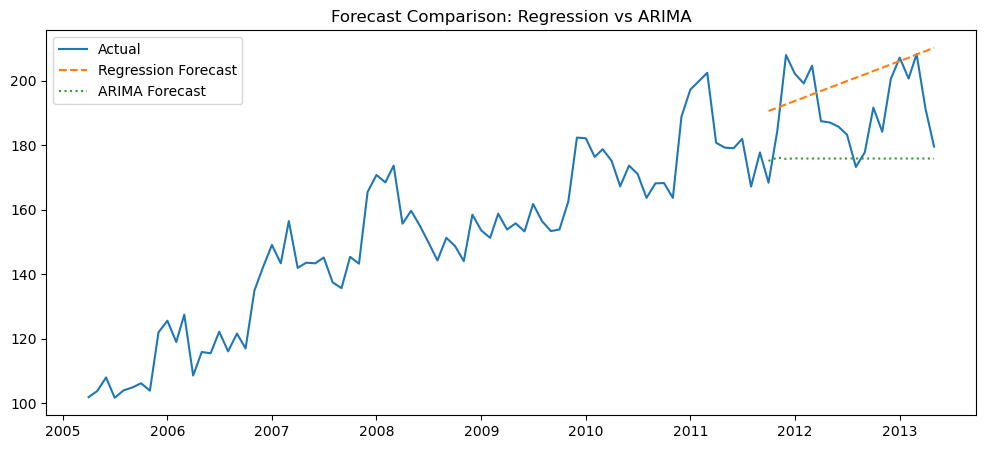

In [49]:
plt.figure(figsize=(12,5))
plt.plot(y, label="Actual")
plt.plot(y_test.index, y_pred_lr, label="Regression Forecast", linestyle="--")
plt.plot(y_test.index, y_pred_arima, label="ARIMA Forecast", linestyle=":")
plt.legend()
plt.title("Forecast Comparison: Regression vs ARIMA")
plt.show()


Linear Regression:

Captures the long-term growth trend effectively

Produces smoother forecasts suitable for budgeting and strategic planning

Slightly over-simplifies short-term fluctuations


ARIMA:

Produces a flatter, more conservative forecast

Better suited for short-term stability

Less responsive to structural growth over time

## Seasonality by Month 

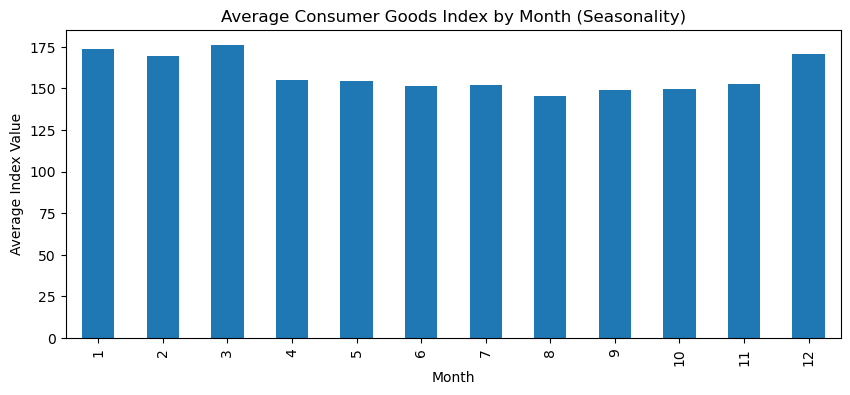

In [50]:

df["month"] = df.index.month
df["year"] = df.index.year
monthly_avg = df.groupby("month")["Consumer goods Total"].mean()

monthly_avg
plt.figure(figsize=(10,4))
monthly_avg.plot(kind="bar")
plt.title("Average Consumer Goods Index by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Index Value")
plt.show()


## Annual Growth Rate

In [51]:
annual_growth_rate = 0.08
monthly_growth_rate = (1 + annual_growth_rate) ** (1/12) - 1

monthly_growth_rate


0.00643403011000343

## Budget Creation

A budget is constructed using a prior-year actuals approach with an
assumed annual growth rate. This mirrors standard FP&A budgeting
methodologies.


In [52]:
df["Budget_Consumer_Goods"] = np.nan

for i in range(12, len(df)):
    df.iloc[i, df.columns.get_loc("Budget_Consumer_Goods")] = (
        df.iloc[i-12]["Consumer goods Total"] * (1 + annual_growth_rate)
    )

df[["Consumer goods Total", "Budget_Consumer_Goods"]].head(15)


,Consumer goods Total,Budget_Consumer_Goods
Month,,
2005-04-01,101.9,NaN
2005-05-01,103.8,NaN
2005-06-01,108.0,NaN
2005-07-01,101.7,NaN
2005-08-01,104.0,NaN
2005-09-01,104.9,NaN
2005-10-01,106.2,NaN
2005-11-01,103.9,NaN
2005-12-01,122.0,NaN


## Budget vs Actual Variance Analysis

Actual performance is compared against budgeted values to calculate
absolute and percentage variances. This forms the core of FP&A
performance tracking.


In [53]:
df["Variance"] = df["Consumer goods Total"] - df["Budget_Consumer_Goods"]
df["Variance_pct"] = df["Variance"] / df["Budget_Consumer_Goods"] * 100

df[["Consumer goods Total", "Budget_Consumer_Goods", "Variance", "Variance_pct"]].dropna().head()


,Consumer goods Total,Budget_Consumer_Goods,Variance,Variance_pct
Month,,,,
2006-04-01,108.6,110.052,-1.452,-1.319376
2006-05-01,115.9,112.104,3.796,3.386141
2006-06-01,115.5,116.640,-1.140,-0.977366
2006-07-01,122.2,109.836,12.364,11.256783
2006-08-01,116.1,112.320,3.780,3.365385


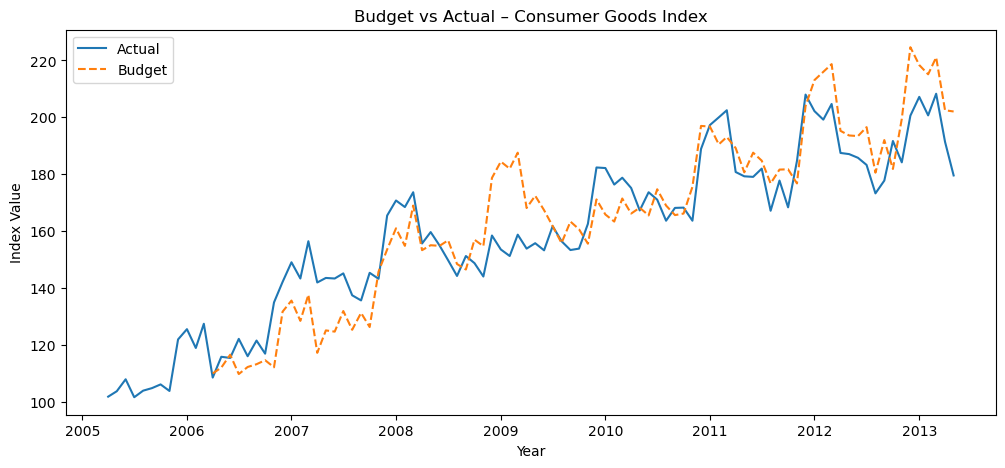

In [54]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Consumer goods Total"], label="Actual")
plt.plot(df.index, df["Budget_Consumer_Goods"], label="Budget", linestyle="--")
plt.title("Budget vs Actual – Consumer Goods Index")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.legend()
plt.show()


The Budget vs Actual chart shows that actual consumer goods performance generally follows the long-term upward trend assumed in the budget, confirming that the growth-based budgeting approach is directionally sound.

## Variance Driver Analysis

Variance is analyzed against key production categories such as consumer
durables, non-durables, and capital goods to identify the primary drivers
behind deviations from budget.


In [ ]:
drivers = ["Consumer Durables", "Consumer Non-durables", "Capital goods", "Basic goods", "Intermediate goods"]

df[drivers].head()


,Consumer Durables,Consumer Non-durables,Capital goods,Basic goods,Intermediate goods
Month,,,,,
2005-04-01,107.2,99.8,85.3,100.3,97.9
2005-05-01,119.4,97.7,99.6,103.5,102.5
2005-06-01,115.0,105.2,105.8,101.5,102.6
2005-07-01,111.7,97.8,106.6,100.6,106.8
2005-08-01,117.7,98.6,113.2,101.8,105.8


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
driver_scaled = scaler.fit_transform(df[drivers])

driver_df = pd.DataFrame(driver_scaled, index=df.index, columns=[d + "_scaled" for d in drivers])

driver_df.head()


,Consumer Durables_scaled,Consumer Non-durables_scaled,Capital goods_scaled,Basic goods_scaled,Intermediate goods_scaled
Month,,,,,
2005-04-01,-1.776779,-1.720539,-2.152485,-1.911452,-2.369967
2005-05-01,-1.595743,-1.835629,-1.924108,-1.720751,-2.049083
2005-06-01,-1.661034,-1.424592,-1.825092,-1.839939,-2.042108
2005-07-01,-1.710003,-1.830149,-1.812315,-1.893574,-1.749127
2005-08-01,-1.620969,-1.786305,-1.706911,-1.822061,-1.818884


In [ ]:
analysis_df = pd.concat([df[["Variance"]], driver_df],axis=1).dropna()

analysis_df.corr()["Variance"].sort_values(ascending=False)


Variance                        1.000000
Consumer Non-durables_scaled   -0.102179
Capital goods_scaled           -0.239253
Intermediate goods_scaled      -0.284349
Consumer Durables_scaled       -0.343097
Basic goods_scaled             -0.402807
Name: Variance, dtype: float64

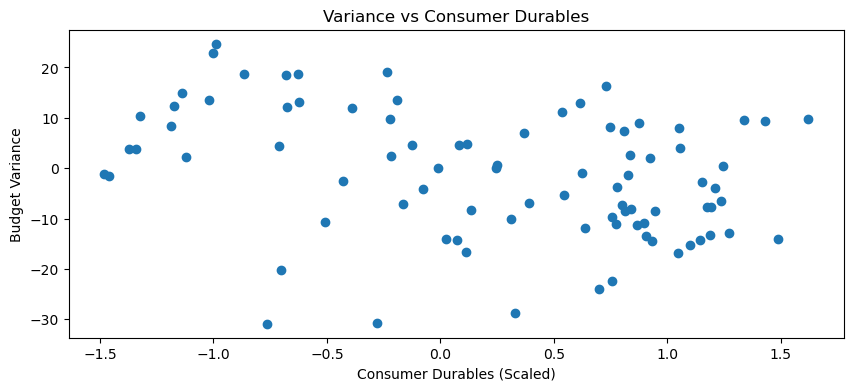

In [58]:
plt.figure(figsize=(10,4))
plt.scatter(
    analysis_df["Consumer Durables_scaled"],
    analysis_df["Variance"]
)
plt.xlabel("Consumer Durables (Scaled)")
plt.ylabel("Budget Variance")
plt.title("Variance vs Consumer Durables")
plt.show()


Very scattered. Consumer durables act as a key volatility driver

Variance is demand-driven rather than purely forecasting error

In [ ]:
summary = df[["Consumer goods Total", "Budget_Consumer_Goods", "Variance", "Variance_pct"]].dropna()

summary.tail()


,Consumer goods Total,Budget_Consumer_Goods,Variance,Variance_pct
Month,,,,
2013-01-01,207.2,218.376,-11.176,-5.117779
2013-02-01,200.7,215.136,-14.436,-6.710174
2013-03-01,208.3,221.076,-12.776,-5.779008
2013-04-01,191.4,202.500,-11.100,-5.481481
2013-05-01,179.6,202.068,-22.468,-11.119029


## Conclusions and FP&A Insights

This analysis demonstrates how applied forecasting methods can support
budgeting and performance evaluation. The results provide actionable
insights for planning, variance management, and future forecasting
improvements.
